# Text Mining to identify most common related terms in NASA API for an arts company to customize their merchandise

### 1) Import Libraries

In [1]:
import pandas as pd
import requests
import seaborn as sns
import string
import numpy as np
import matplotlib.pyplot as plt
import nltk

### 2) Set up API credentials

Note: The following code is designed to retrieve data from the NASA API. To enhance efficiency and avoid prolonged execution times, the obtained API data is stored in a CSV file.)

In [2]:
# import requests
# import pandas as pd
# from datetime import datetime, timedelta


# #fetching all the image details will take some time...suggest you make a cup of tea in the meantime 

# API_KEY = 'UwDAwpMznaAMMxln9t7CCcJWwVRIhvzFBkH83sFi'
# BASE_URL = 'https://api.nasa.gov/planetary/apod'

# def fetch_apod_data(start_date, end_date, api_key):
#     dates = pd.date_range(start=start_date, end=end_date)
#     data = []
#     for date in dates:
#         params = {'api_key': api_key, 'date': date.strftime('%Y-%m-%d')}
#         response = requests.get(BASE_URL, params=params)
#         if response.status_code == 200:
#             data.append(response.json())
#             print('done')
#         else:
#             print(f"Failed to fetch data for {date.strftime('%Y-%m-%d')}")
#     return pd.DataFrame(data)

# # Set the date range for the past year
# end_date = datetime.now()
# start_date = end_date - timedelta(days=365)

# # Fetch the data
# apod_data = fetch_apod_data(start_date, end_date, API_KEY)

In [3]:
# Load the CSV file into a DataFrame
csv_file_path = 'apod_data_NASA.csv'                       # Replace with your file path
space_exploration_data = pd.read_csv(csv_file_path)

### 3) Create list of space related terms provided by the client (An arts merchandise firm)

**Assumption:** We have assumed that these terms have been provided by our client, an arts merchandise firm, to customize their product line.

**Source of the terms:** ChatGPT

In [4]:
space_related_terms =  [
    "Galaxy", "Nebula", "Star", "Comet", "Asteroid", "Meteor", "Black Hole",
    "Supernova", "Quasar", "Universe", "Satellite", "Lunar", "Solar",
    "Eclipse", "Aurora",
    "Exoplanet", "Red Giant", "White Dwarf", "Wormhole", "Celestial",
    "Milky Way", "Andromeda", "Dwarf Planet", "Solar Flare", "Solar System",
    "Galaxy Cluster", "Star Cluster", "Meteor Shower", "Meteorite",
    "Solar Sail", "Space Elevator",
    # Planets and Moons
    "Mercury", "Venus", "Earth", "Moon", "Mars", "Phobos", "Deimos", "Jupiter",
    "Io", "Europa", "Ganymede", "Callisto", "Saturn", "Mimas", "Enceladus", "Tethys",
    "Dione", "Rhea", "Titan", "Iapetus", "Uranus", "Miranda", "Ariel", "Umbriel",
    "Titania", "Oberon", "Neptune", "Triton", "Proteus", "Nereid", "Pluto", "Charon",
    "Nix", "Hydra", "Kerberos", "Styx"
]

space_related_terms = [word.lower() for word in space_related_terms]             

### 4) Pre-process the words for analysis (Tokenizing, lowercasing, and lemmatizing)

In [5]:
def word_cleaner(data):
    import nltk
    from nltk.tokenize import word_tokenize                          
    nltk.download('punkt')                                           
    from nltk.stem import WordNetLemmatizer
    nltk.download('wordnet')

# Tokenize and lowercase the words in the dataset followed by lemmatization
    text = data.tolist()        
    text_join = " ".join(text)                               
    text_join_tokens = word_tokenize(text_join)              
    lower_text = [word.lower() for word in text_join_tokens]    

    lemmatizer = WordNetLemmatizer()
    lower_text = [lemmatizer.lemmatize(word) for word in lower_text]
    
# Filter words to include only those in space_related_terms
    filtered_text = [token 
                for token in lower_text
                if token in space_related_terms]
    return filtered_text

In [6]:
filtered_text = word_cleaner(space_exploration_data['explanation'])

[nltk_data] Downloading package punkt to C:\Users\Antara
[nltk_data]     Lole\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Antara
[nltk_data]     Lole\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 5) Import additional libraries relevant for text mining and creation of visualization

In [7]:
!pip install -U spacy 
!python -m spacy download en_core_web_sm 
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/90/f0/0133b684e18932c7bf4075d94819746cee2c0329f2569db526b0fa1df1df/spacy-3.7.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/71/46/af01a20ec368bd9cb49a1d2df15e3eca113bbf6952cc1f2a47f1c6801a7f/murmurhash-1.0.10-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/c1/c3/dd044e6f62a3d317c461f6f0c153c6573ed13025752d779e514000c15dd2/cymem-2.0.8-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for preshed<3.1.0,>=3.0.2 from https://files.pythonhosted.org/packages/e4/fc/78cdbdb79f5

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB 1.3 MB/s eta 0:00:10
     ---------------------------------------- 0.1/12.8 MB 1.3 MB/s eta 0:00:10
     - -------------------------------------- 0.4/12.8 MB 2.8 MB/s eta 0:00:05
     --- ------------------------------------ 1.0/12.8 MB 5.8 MB/s eta 0:00:03
     ------- -------------------------------- 2.3/12.8 MB 10.6 MB/s eta 0:00:01
     ------------ --------------------------- 3.9/12.8 MB 14.7 MB/s eta 0:00:01
     ----------------- ---------------------- 5.4/12.8 MB 17.4 MB/s eta 0:00:01
     --------------------- ------------------ 7.0/12.8 MB 19.3 MB/s eta 0:00:01
     ------------------------- -------------- 8.2/12.8 MB 20.2 MB/s eta 0:00:01
     --------------------------- ------------ 8.9/12.8 MB 19.6 MB/s eta 0:00:01
     ------------------------------ -------- 10.0/12.8 MB 20.0 MB/s eta 0:00:01
     ---------------------------------- ---- 11.4/12

In [8]:
from collections import Counter
import itertools
import networkx as nx

### 6) Create functions to prepare dataset required for visualization

#### 6.1) This function generates a list of space-related terms (occurrence list) as specified by the client. Additionally, it also generates a list of terms that co-occur with the mentioned space-related terms (co-occurrence list)

In [9]:
## Function to extract the space_related_terms and the co-occuring pairs from the dataset

def process_to_extract_cooccurring_pairs(data,terms):
    
    # Initialize lists to store found space_related_terms and their co-occurrences (pairs)
    term_occurrences = []
    term_cooccurrences = []
    
    # Process each data entry in the dataset
    for datum in data:
        # Find and store space_related_terms present in each data entry
        terms_in_datum = set(term for term in terms if term.lower() in datum.lower())
        term_occurrences.extend(terms_in_datum)
        
        # Store all possible pairs (co-occurrences) of space_related_terms in the data entry
        term_cooccurrences.extend(itertools.combinations(terms_in_datum, 2))
        
    return term_occurrences,term_cooccurrences 

In [10]:
term_occurrences,term_cooccurrences = process_to_extract_cooccurring_pairs(space_exploration_data['explanation'],space_related_terms)

#### 6.2) This function determines the top five space related terms that occur most frequently

In [11]:
## Function to determine the top 5 terms

def top_five_frequent_terms(term_occurrences):
    # Count the frequencies of all space_related_terms
    term_frequency_counts = Counter(term_occurrences)

    # Identify the top 5 most frequent space_related_terms
    top_five_terms = [term for term, freq in term_frequency_counts.most_common(5)]
    
    return top_five_terms, term_frequency_counts

In [12]:
top_five_terms, term_frequency_counts = top_five_frequent_terms(term_occurrences)

#### 6.3) This function assigns specific colors to the top five space related terms for ease of visualization of the terms that co-occur with the top five terms

In [13]:
## Function to define colors for the top 5 terms

def top_five_terms_colors(top_five_terms):
    # Assign unique colors to each of the top 5 terms
    top_term_colors = ['red', 'green', 'yellow', 'purple', 'orange']

    # Map top terms to their colors
    top_term_to_color = dict(zip(top_five_terms, top_term_colors))
    
    return top_term_to_color

In [14]:
top_term_to_color = top_five_terms_colors(top_five_terms)

#### 6.4) This function limits the number of co-ocurring terms with the top five terms

In [15]:
## Function to limit the # of connections for the top 5 terms

def limit_number_of_connections(term_cooccurrences,top_five_terms,connection_limiter):
    
    # Limit connections for each of the top 5 terms
    limited_term_pairs = []
    for term in top_five_terms:
        # Find pairs that include the space_related_term
        relevant_pairs = [pair for pair in term_cooccurrences if term in pair]

        # Count frequencies of connections excluding the other top 4 terms
        connection_frequency_counts = Counter(item for pair in relevant_pairs for item in pair if item != term and item not in top_five_terms)

        # Get the most common connections up to the specified limit
        top_connections = [item[0] for item in connection_frequency_counts.most_common(connection_limiter)]
    
        # Create pairs with the term and each of its top connections
        limited_term_pairs.extend([(term, connection) for connection in top_connections])
    
    return limited_term_pairs

In [16]:
limited_term_pairs = limit_number_of_connections(term_cooccurrences,top_five_terms,4)

### 7) Visualization network

The visualization network comprises of the top five terms (with the respective assigned colors). The size of the node signifies the frequency of the space related term (i.e., larger the size of the node, higher is the frequency) as provided by the client.

**How to interpret the network:** 'Io,' Jupiter's moon, stands out as the most frequently mentioned space-related term and is consistently linked with terms such as 'solar,' 'galaxy,' 'star cluster,' and 'milky way.' Consequently, the arts firm can plan to customize the designs of their merchandise to incorporate Io along with the associated celestial elements.

In [17]:
def plot_function(connection_term_pairs):
    # Create a network graph from the limited term pairs
    network_graph = nx.Graph()
    network_graph.add_edges_from(connection_term_pairs)

    # Position nodes using a layout
    pos = nx.spring_layout(network_graph)

    # Draw the network graph with unique node and edge colors for top terms
    plt.figure(figsize=(25,25))

    # Determine node sizes based on term frequency (with a smaller scaling factor)
    node_sizes = [max(term_frequency_counts.get(node, 1) * 50, 100) for node in network_graph.nodes()]  # Adjust the scaling factor as needed

    # Draw nodes with sizes based on term frequency
    nx.draw_networkx_nodes(network_graph, pos, node_size=node_sizes, node_color=[top_term_to_color.get(node, 'lightblue') for node in network_graph.nodes()])

    # Draw edges for each top term in its color
    for term, color in top_term_to_color.items():
        edges = [(source, target) for source, target in network_graph.edges() if source == term or target == term]
        nx.draw_networkx_edges(network_graph, pos, edgelist=edges, edge_color=color, width=2)

    # Draw labels
    nx.draw_networkx_labels(network_graph, pos, font_size=12)

    # Add a legend showing the top 5 words, their colors, and frequencies
    for term, color in top_term_to_color.items():
        plt.scatter([], [], c=color, label=f"{term} (Freq: {term_frequency_counts[term]})")
    plt.legend(title="Top 5 Space Related Terms", loc='upper right',title_fontsize='20',fontsize='16')

    # Add the first title
    plt.text(0.5, 1.05, "Network of Top 5 Space-Related Terms", fontsize='22', ha='center', va='bottom', fontweight='bold', transform=plt.gca().transAxes)

    # Add the second title below the first one
    plt.text(0.5, 1.03, "Note: Light blue nodes represent the terms that co-occur with the top five space related terms.", fontsize='16', ha='center', va='bottom', transform=plt.gca().transAxes)


    plt.axis('off')  # Turn off the axis
    plt.show()

## Network plot

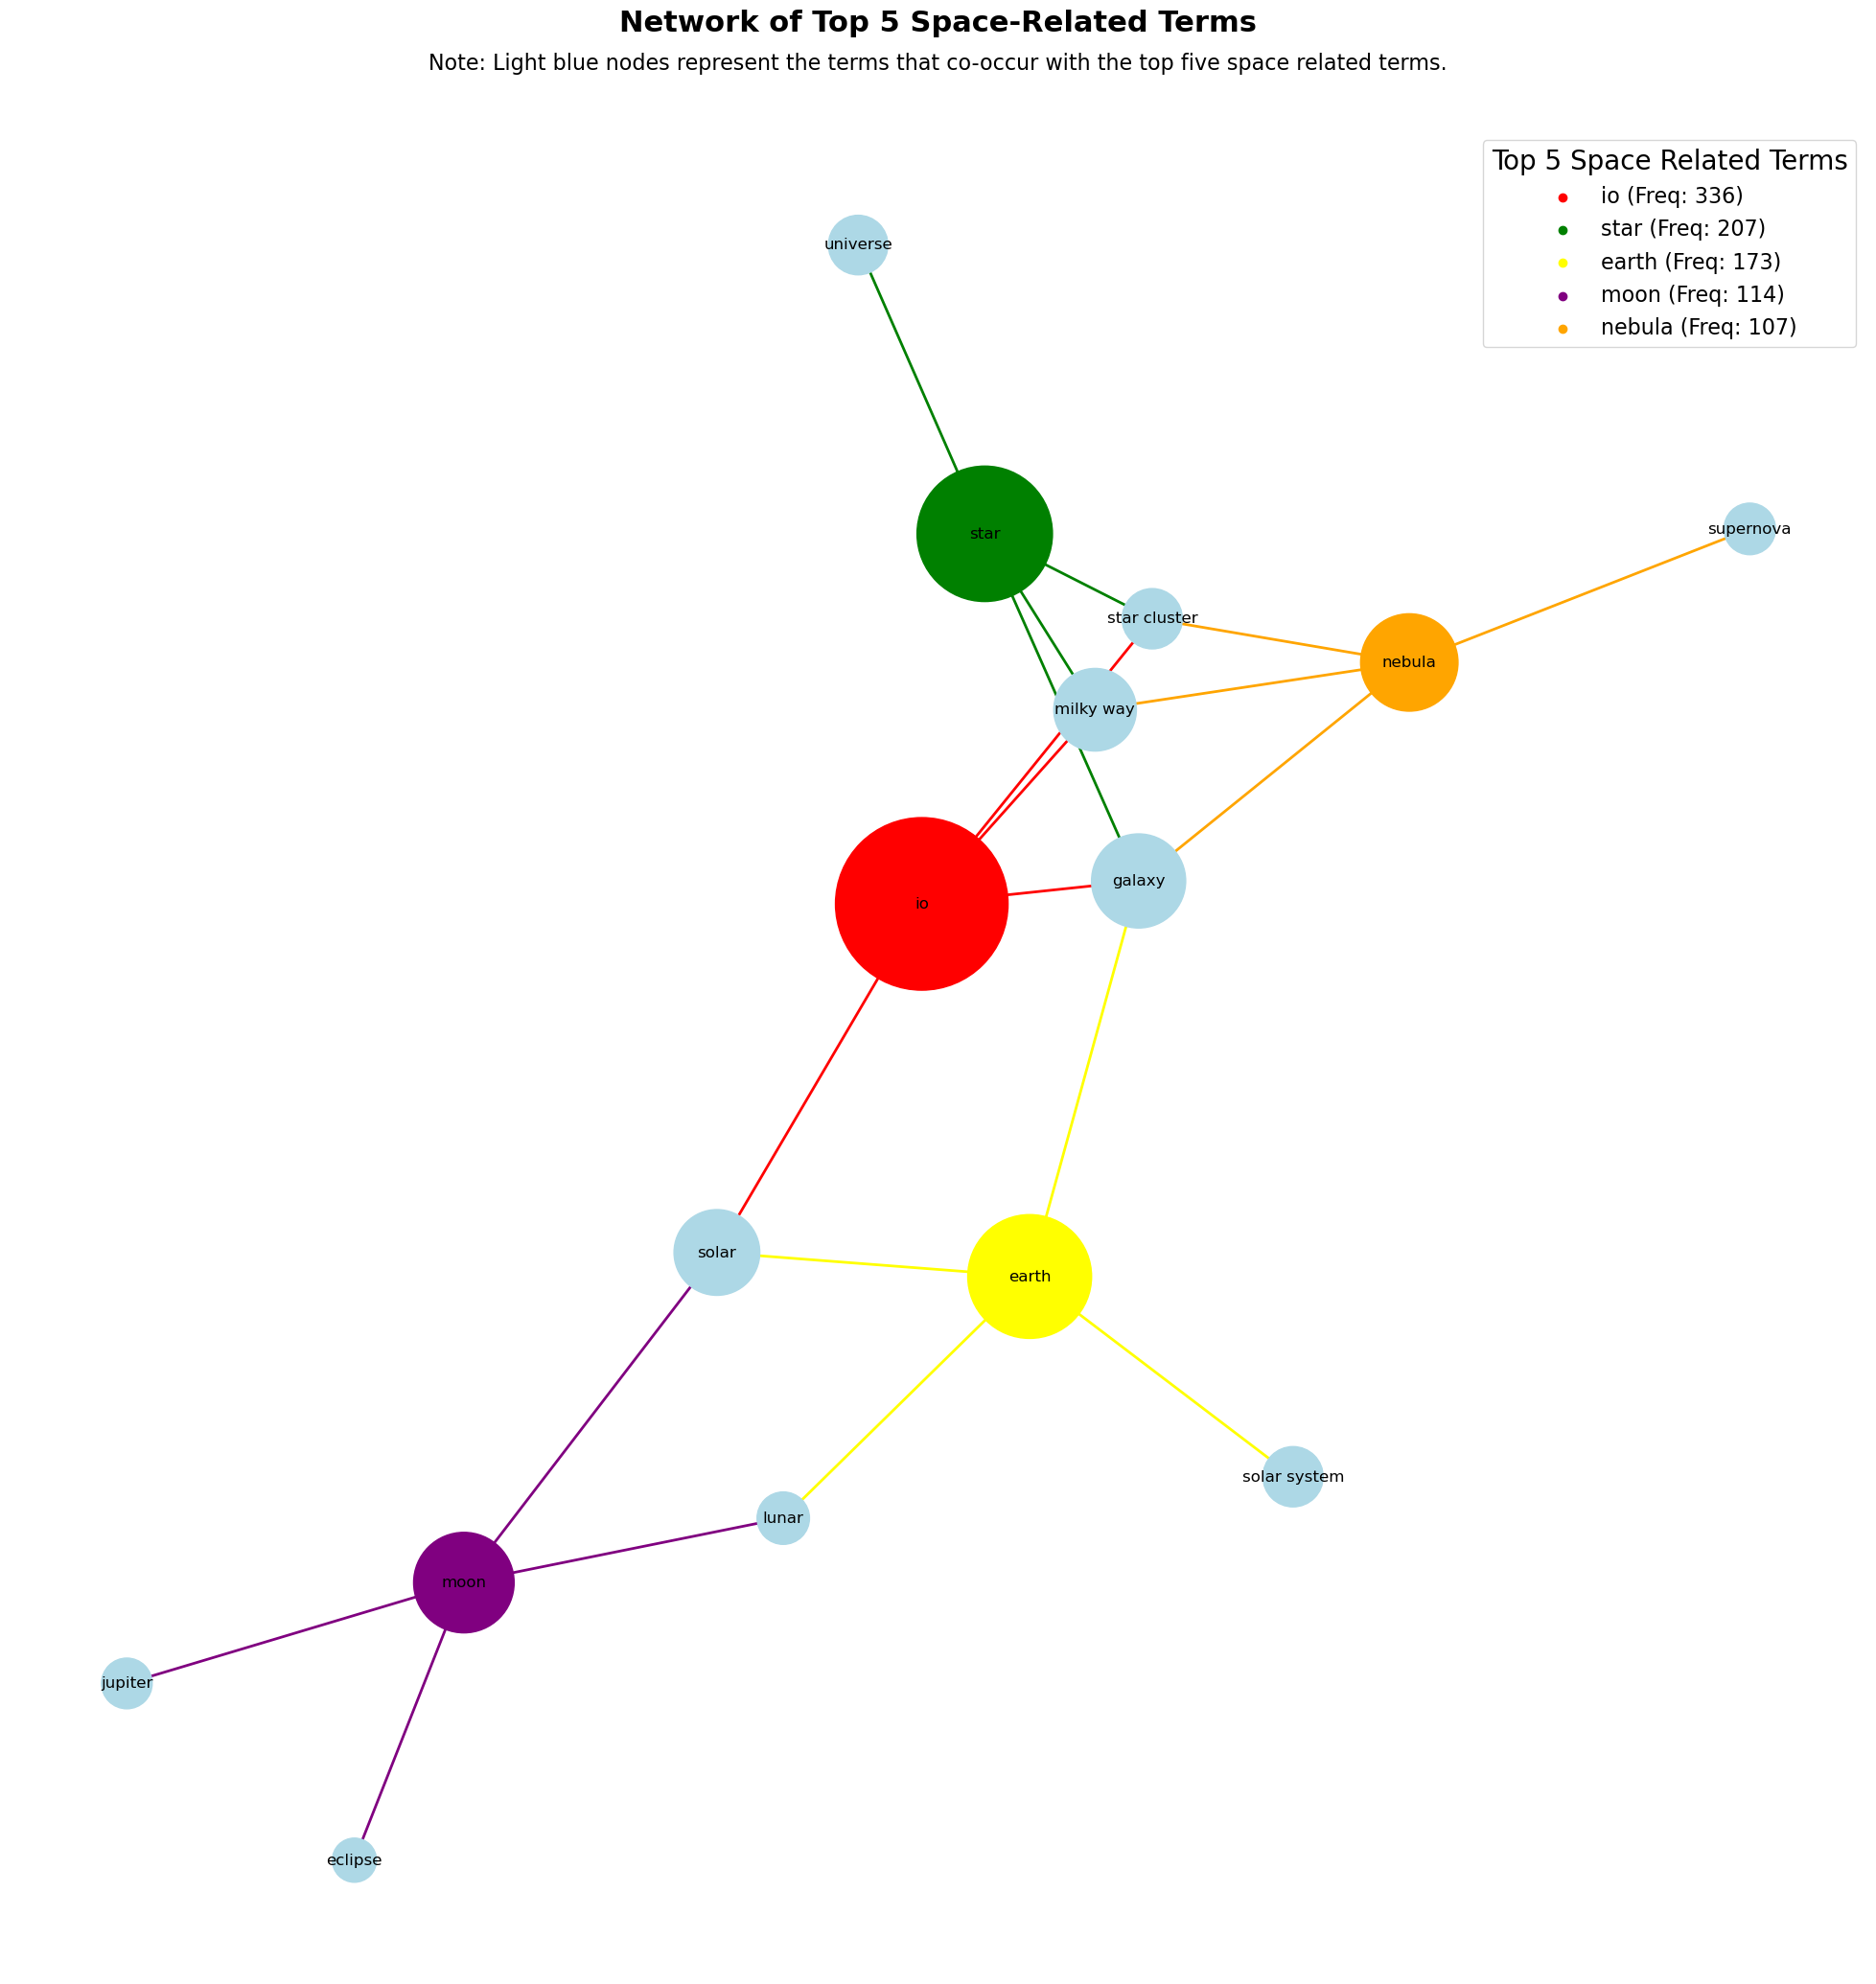

In [18]:
plot_function(limited_term_pairs)

## Minireport

An arts merchandise firm tasked us with identifying the most engaging astronomical themes for their upcoming product line. They provided a list of space-related terms, seeking insights into which themes would best resonate with the astronomy community. Consequently, we set out to answer the question: "Which astronomical themes from this list are most popular among the astronomy community?"

To address this, we analysed the descriptions of NASA's Astronomy Picture of the Day (APOD), focusing on the occurrence and co-occurrence of the provided astronomical terms. This analysis was visualized using a network graph, where the size of each node represented the frequency of each term, and the links between them highlighted the terms that co-occurred with each of the top words.

The analysis identified _"earth," "io," "star," "nebula," and "moon"_ as the top themes. These themes also showed significant connections with other specific astronomical phenomena. For instance, _"earth"_ frequently appeared alongside the terms _"solar system"_ and _"galaxy."_ Further details can be seen in the network plot. These patterns indicate the popularity and relevance of the top themes within the astronomy community.

Incorporating these themes into the firm's merchandise designs is expected to strongly resonate with astronomy enthusiasts and help boost company sales for the upcoming product line launch.